In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
from keras.utils import np_utils
import matplotlib.pyplot as plt
# np.random.seed(10)

from keras.datasets import mnist

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [101]:
#收集的資料,要訓練模型用
df = pd.read_excel("c:/pythondata/2330_20180702.xlsx")
#df = pd.read_excel("c:/pythondata/stockModel_20180418_0601.xlsx")
#df = df[df['上市上櫃'] == 2]
#df = pd.read_excel("c:/pythondata/stockModel_20180525.xlsx",'5')
df.fillna(0 ,inplace = True)

#要預測的資料
'''
df_pre = pd.read_excel("c:/pythondata/StockMerg_20180418_0601 _多.xlsx")
df_pre = df_pre[df_pre['上市上櫃'] == 1]
df_pre.tail()
df_pre.fillna(0 ,inplace = True)
'''
#df_pre = pd.read_excel("c:/pythondata/StockMerg_20180514_0518.xlsx")
#df_pre = df.copy()
#df_pre = df_pre[(df_pre['date'] == '2018-04-18') | (df_pre['date'] == '2018-04-19') | (df_pre['date'] == '2018-04-20')]

print("read ok")

read ok


In [102]:
from sklearn.model_selection import train_test_split

In [103]:
df1 = df.copy()
df1.head()
df1.drop(['日期'],axis=1,inplace=True)
#df1.drop(['日期','股票代號','股票名稱_x','選股日','股票名稱_y','產業名稱','上市上櫃','存續年度','細產業名稱','經營項目'
#],axis=1,inplace=True)
#df1 = df1.iloc[:,:-7]
df1.head()
#df1 = df1[(df1['賺_5'] == 'N') | (df1['賺_5'] == 'Y')]
#len(df1)

,開盤,最高,最低,收盤,漲跌%,均價20,均價60,均價240,布林上20,布林中20,...,OSC,DIF,MACD,均線乖離均20,威廉指標24,威廉指標72,RSI6,RSI13,外資買賣超,updown
0,59.2,59.2,58.8,59.0,-0.3378,60.32,61.71,65.68,62.69,60.32,...,-0.36,-0.48,-0.30,-1.51,-73.77,-80.49,35.70,42.17,-3031,0
1,59.2,59.6,59.0,59.0,0.0000,60.29,61.63,65.64,62.71,60.29,...,-0.36,-0.53,-0.35,-1.46,-73.77,-80.49,35.70,42.17,23789,0
2,59.5,59.8,58.9,59.2,0.3390,60.20,61.57,65.60,62.63,60.20,...,-0.31,-0.54,-0.39,-1.43,-70.49,-78.05,39.93,43.46,3271,0
3,59.5,59.7,59.1,59.6,0.6757,60.22,61.49,65.57,62.62,60.22,...,-0.21,-0.51,-0.41,-1.37,-63.93,-73.17,48.12,46.08,668,0
4,59.5,59.7,58.7,59.5,-0.1678,60.27,61.40,65.54,62.57,60.27,...,-0.13,-0.50,-0.43,-1.31,-80.00,-74.39,46.23,45.51,-1794,0


In [115]:
#df1 = df.copy()

'''
getColName = ['主力 TOP15連買','外資連N日買超','投信 連買(天)'
                , '5日漲幅(%)','20日漲幅(%)','近20日資餘增減','大戶近1週增減％','散戶近1週增減％','成交量'
             ,'股價乖離月線幅度(%)','股價乖離季線幅度(%)','股價乖離年線幅度(%)']
'''

getColName = ['主力 TOP15連買','三大法人連N日買超' ,'外資連N日買超','投信 連買(天)'     
              ,'5日漲幅(%)','20日漲幅(%)','近20日資餘增減','大戶近1週增減％','散戶近1週增減％'
              ,'主力 TOP15 買超新高(天)','主力 TOP15買家集中天數(％)'
              ,'股價乖離月線幅度(%)','股價乖離季線幅度(%)','股價乖離年線幅度(%)']

#x_df = df1.loc[:,getColName]
x_df = df1.iloc[:,:-7]
#X_pre = df_pre.loc[:,getColName]

# updown5 updown10 updown20 updown
y_df = pd.DataFrame( df1['賺_5'],columns=['賺_5'])
y_df[y_df['賺_5'] == 'Y'] = 1
y_df[y_df['賺_5'] == 'N'] = 0
y_df.head()



,賺_5
0,0
1,1
2,1
3,0
4,0


In [104]:
x_df = df1.iloc[:,:-1]
x_df.head()


,開盤,最高,最低,收盤,漲跌%,均價20,均價60,均價240,布林上20,布林中20,...,D9,OSC,DIF,MACD,均線乖離均20,威廉指標24,威廉指標72,RSI6,RSI13,外資買賣超
0,59.2,59.2,58.8,59.0,-0.3378,60.32,61.71,65.68,62.69,60.32,...,28.99,-0.36,-0.48,-0.30,-1.51,-73.77,-80.49,35.70,42.17,-3031
1,59.2,59.6,59.0,59.0,0.0000,60.29,61.63,65.64,62.71,60.29,...,24.10,-0.36,-0.53,-0.35,-1.46,-73.77,-80.49,35.70,42.17,23789
2,59.5,59.8,58.9,59.2,0.3390,60.20,61.57,65.60,62.63,60.20,...,21.06,-0.31,-0.54,-0.39,-1.43,-70.49,-78.05,39.93,43.46,3271
3,59.5,59.7,59.1,59.6,0.6757,60.22,61.49,65.57,62.62,60.22,...,21.07,-0.21,-0.51,-0.41,-1.37,-63.93,-73.17,48.12,46.08,668
4,59.5,59.7,58.7,59.5,-0.1678,60.27,61.40,65.54,62.57,60.27,...,23.99,-0.13,-0.50,-0.43,-1.31,-80.00,-74.39,46.23,45.51,-1794


In [105]:
#y_df = pd.DataFrame( df1['updown'],columns=['updown'])
y_df = pd.DataFrame()
y_df['updown'] = df1['updown']
#y_df.drop(['updown'],axis=0,inplace=True)
y_df.head()

,updown
0,0
1,0
2,0
3,0
4,0


In [106]:
#type(y_df)
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 1 columns):
updown    2603 non-null int64
dtypes: int64(1)
memory usage: 20.4 KB


In [86]:
len(y_df)

2603

In [107]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler()
#x_df.head()
x_train_image, x_test_image,  y_train_label, y_test_label = train_test_split(x_df,y_df, random_state=0,train_size=0.8, test_size=0.2)

In [88]:
y_test_label.head()

,updown
2598,0
2407,0
2136,0
2165,1
1100,0


In [110]:
x_train_image = x_train_image.values
x_train_image=minmax_scale.fit_transform(x_train_image)
x_test_image = x_test_image.values
x_test_image=minmax_scale.fit_transform(x_test_image)
y_train_label = y_train_label.values
y_test_label = y_test_label.values

In [111]:
print("Train data=", len(x_train_image))
print("Test data=", len(x_test_image))

print("The Shpae of x_train_image : ", x_train_image.shape)
print("The Shpae of y_train_label : ", y_train_label.shape)
print("The Shpae of x_train_image : ", x_test_image.shape)
print("The Shpae of y_train_label : ", y_test_label.shape)


Train data= 2082
Test data= 521
The Shpae of x_train_image :  (2082, 27)
The Shpae of y_train_label :  (2082, 1)
The Shpae of x_train_image :  (521, 27)
The Shpae of y_train_label :  (521, 1)


In [112]:
x_train_image[:5]

array([[0.79876161, 0.78988838, 0.7965502 , 0.79034724, 0.56701618,
        0.80874214, 0.77017459, 0.7522956 , 0.7699158 , 0.80874214,
        0.81440953, 0.77075099, 0.74105754, 0.12738613, 0.12203741,
        1.        , 0.82228321, 0.68330547, 0.58874802, 0.71945047,
        0.7459087 , 0.76572008, 1.        , 1.        , 0.8003876 ,
        0.79475558, 0.55784763],
       [0.78107032, 0.77237908, 0.77885891, 0.77069229, 0.40598139,
        0.82127821, 0.81648885, 0.78061253, 0.77273729, 0.82127821,
        0.83697284, 0.67014014, 0.68390358, 0.13613974, 0.07555125,
        0.4444    , 0.56070252, 0.5720086 , 0.50871632, 0.55314534,
        0.59173127, 0.62373225, 0.7619    , 0.8333    , 0.46281492,
        0.49482033, 0.50736555],
       [0.16187528, 0.16042898, 0.16010615, 0.1622625 , 0.64933675,
        0.15029093, 0.11949564, 0.06928026, 0.13358021, 0.15029093,
        0.1653997 , 0.7768595 , 0.78499222, 0.36907583, 0.43367923,
        1.        , 0.70241493, 0.49319322, 0.5261

In [48]:
# 輸出值的預處理
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

In [51]:
type(y_TrainOneHot)
y_TrainOneHot[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [115]:
# Building Training Network
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

#sigmoid /softmax / kernel_initializer=normal
model = Sequential()
model.add(Dense(units=100, input_dim=27, kernel_initializer="normal", activation="sigmoid"))
model.add(Dense(units=50, kernel_initializer="normal", activation="sigmoid"))
model.add(Dense(units=20, kernel_initializer="normal", activation="sigmoid"))
#model.add(Dense(units=8, kernel_initializer="normal", activation="sigmoid"))
model.add(Dense(units=1, kernel_initializer="normal", activation="softmax"))

In [93]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train","validation"], loc="upper left")
    plt.show()



Train on 1665 samples, validate on 417 samples
Epoch 1/10
 - 1s - loss: 14.5636 - acc: 0.0865 - val_loss: 14.1838 - val_acc: 0.1103
Epoch 2/10
 - 0s - loss: 14.5636 - acc: 0.0865 - val_loss: 14.1838 - val_acc: 0.1103
Epoch 3/10
 - 0s - loss: 14.5636 - acc: 0.0865 - val_loss: 14.1838 - val_acc: 0.1103
Epoch 4/10
 - 0s - loss: 14.5636 - acc: 0.0865 - val_loss: 14.1838 - val_acc: 0.1103
Epoch 5/10
 - 0s - loss: 14.5636 - acc: 0.0865 - val_loss: 14.1838 - val_acc: 0.1103
Epoch 6/10
 - 0s - loss: 14.5636 - acc: 0.0865 - val_loss: 14.1838 - val_acc: 0.1103
Epoch 7/10
 - 0s - loss: 14.5636 - acc: 0.0865 - val_loss: 14.1838 - val_acc: 0.1103
Epoch 8/10
 - 0s - loss: 14.5636 - acc: 0.0865 - val_loss: 14.1838 - val_acc: 0.1103
Epoch 9/10
 - 0s - loss: 14.5636 - acc: 0.0865 - val_loss: 14.1838 - val_acc: 0.1103
Epoch 10/10
 - 0s - loss: 14.5636 - acc: 0.0865 - val_loss: 14.1838 - val_acc: 0.1103


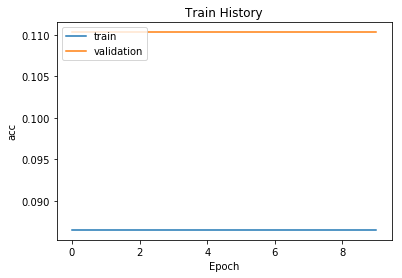

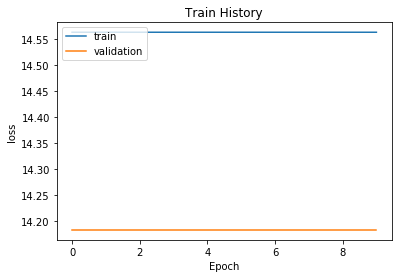

In [117]:
model.compile(loss="binary_crossentropy", optimizer= "rmsprop", metrics=["accuracy"])
#optimizer = rmsprop  / SGD(lr=0.001) /adam
#loss =categorical_crossentropy / mse /binary_crossentropy
#Training / SGD(lr=0.001)
#train_history=model.fit(x=x_train_image, y=y_TrainOneHot, validation_split=0.2, epochs=20, batch_size=250, verbose=2)
#train_history=model.fit(x=x_train_image, y=y_TrainOneHot, validation_split=0.2, epochs=20, batch_size=64, verbose=2)
train_history=model.fit(x=x_train_image, y=y_train_label, validation_split=0.2, epochs=10, batch_size=1500, verbose=2)


show_train_history(train_history,"acc","val_acc")
show_train_history(train_history,"loss","val_loss")

In [95]:
#評估模型準確度
scores = model.evaluate(x_test_image, y_test_label)
print()
print("Accuracy = ", scores[1])


521/521 [==============================] - 0s 123us/step

Accuracy =  0.08253358925143954


In [ ]:

#(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()


# 輸入值的預處理
x_Train = x_train_image.reshape(2848, 8).astype("float32")
x_Test = x_test_image.reshape(2848, 8).astype("float32")
print("The Shpae of x_Train : ", x_Train.shape)
print("The Shpae of x_Test : ", x_Test.shape)

# print("x_Train[0] : ", x_Train[0])
# print("x_Test[0] : ", x_Test[0])

x_train_normalize = x_Train/1
x_test_normalize=x_Test/1

# 輸出值的預處理
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)
# 5 = [0,0,0,0,0,1,0,0,0,0]  (0~9的數字)

# Building Training Network
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model = Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer="normal", activation="sigmoid"))
model.add(Dense(units=256, kernel_initializer="normal", activation="sigmoid"))
model.add(Dense(units=10, kernel_initializer="normal", activation="softmax"))

# Setting Training Parameters
# categorical_crossentropy / adam

model.compile(loss="mse", optimizer=SGD(lr=0.001), metrics=["accuracy"])

#Training
train_history=model.fit(x=x_train_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=20, batch_size=100, verbose=2)

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train","validation"], loc="upper left")
    plt.show()

show_train_history(train_history,"acc","val_acc")
show_train_history(train_history,"loss","val_loss")

#評估模型準確度
scores = model.evaluate(x_test_normalize, y_TestOneHot)
print()
print("Accuracy = ", scores[1])

#進行預測
prediction=model.predict_classes(x_Test)
print()
print("Prediction = ", prediction)
print("The Shape of Prediction = ", prediction.shape)

Crosstab = pd.crosstab(y_test_label, prediction, rownames=["label"], colnames=["predict"])
print(Crosstab)
df = pd.DataFrame({"label":y_test_label, "predict":prediction})